<a href="https://colab.research.google.com/github/AtriSaxena/Tensorflow-2.X-Zero2Mastery/blob/main/01_neural_network_regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to regression with neural network in Tensorflow

In [ ]:
#Import TEnsorflow
import tensorflow as tf
tf.__version__

'2.5.0'

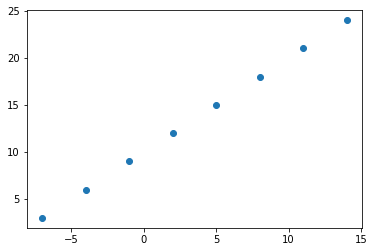

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

#Create features 
X = np.array([-7.0, -4.0,-1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Creating labels 
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize 
plt.scatter(X,y);

In [ ]:
#The relation
y == X + 10 

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
#Create a demo tensor for our housing price prediction problem 
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
input_shape = X.shape 
output_shape = y.shape
input_shape, output_shape 

((8,), (8,))

In [ ]:
input_shape = X[0].shape 
output_shape = y[0].shape
input_shape, output_shape 

((), ())

In [ ]:
#Turn our numpy array into tensor 
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with tensorflow

1. Creating a model - define the input and output layer, as well as the hidden layers of a deep learning model. 
2. Compiling a model - define the loss function. optimizer, and evaluation metrics.
3. Fitting a model 

In [ ]:
#Set random seed 
tf.random.set_seed(42)

#1. Create a model using the Sequential API 
model = tf.keras.Sequential([
     tf.keras.layers.Dense(1)                        
])

#2. Compiling the model 
#MAE: Mean Absolute error
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit the model 
model.fit(X,y,epochs=5)



Epoch 1/5
1/1 [==============================] - 1s 651ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
y_pred = model.predict([17.0]) #should be around 27 
y_pred

array([[12.716021]], dtype=float32)

### Improving our model.

In [ ]:
# Let's rebuilt our code

#1. Create the model 
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)
])

model.compile(loss=tf.losses.mae, 
              optimizer = tf.optimizers.SGD(),
              metrics=["mae"])

model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 246ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5

In [ ]:
#Prediction
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
#Lets see if we can imporve our model using the additional hidden layer. 

model = tf.keras.Sequential([
            tf.keras.layers.Dense(10, activation=None),
            tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), metrics =["mae"])

model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 397ms/step - loss: 14.2508 - mae: 14.2508
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 14.0100 - mae: 14.0100
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 13.7709 - mae: 13.7709
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 13.5330 - mae: 13.5330
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 13.2955 - mae: 13.2955
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 13.0577 - mae: 13.0577
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 12.8192 - mae: 12.8192
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 12.5794 - mae: 12.5794
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 12.3378 - mae: 12.3378
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 12.0940 - mae: 12.0940
Epoch 11/100
1/1 [==============================] - 0s 4

In [ ]:
#Prediction
model.predict([17.0])

array([[28.916777]], dtype=float32)

### Evaluating the model

when it comes to evaluation...there are 3 words you should memorize: 
> Visualize, Visualize, Visualize

It's a good idea to visualize 
* The data - what data we are working with. What it looks like? 
* the model itself - what does our model looks like? 
* The training of a model - how does our model performs while training. 
* The predictions of the model.

In [ ]:
#Make a bigger dataset
X= tf.range(-100, 100, 4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

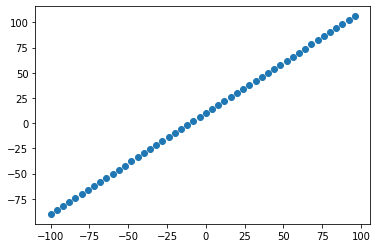

In [ ]:
#Visualize the data
import matplotlib.pyplot as plt 

plt.scatter(X,y)

### Split the data

* Training
* Validation 
* Testing

In [ ]:
#Check the length of the data
len(X)

50

In [ ]:
#Split the data into train and test set 
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train),len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

## Visualizing the data



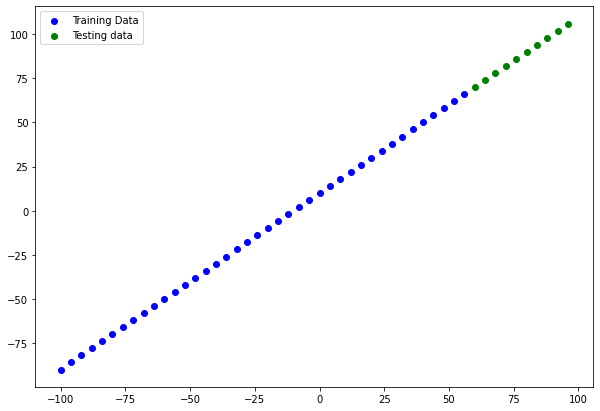

In [ ]:
plt.figure(figsize=(10,7))
#Train in blue 
plt.scatter(X_train, y_train, c='b',label="Training Data")

#Train in green
plt.scatter(X_test, y_test, c='g', label='Testing data')

plt.legend()

In [ ]:
# Let's have a look at how to build a neural network for our data

#1. Create a model 

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the data
#model.fit(X_train,y_train)

#### Visualize the model

In [ ]:
model.summary() ##Important check error

ValueError: ignored

In [ ]:
#Let's create a model which builds automatically by defining the input shape in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([ 
                tf.keras.layers.Dense(10,input_shape=[1], name="Input_layer"),
                tf.keras.layers.Dense(1, name="Output_layer")
], name="Regression_Model")

#2. Compile the model 

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics =["mae"])

model.summary()

Model: "Regression_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100,verbose=0)

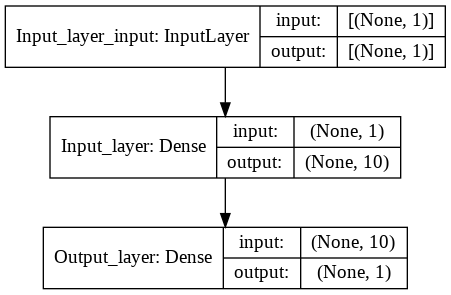

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

### Visualize model predictions

To visualize predictions its a good idea to plot them against ground truth table.

Often you will see this in the form of `y_test` or `y_true` vs `y_pred` (ground truth vs your model predictions)

In [ ]:
# Make some predictions 
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Create a plotting function
def plot_predictions(train_data=X_train,train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=y_pred):
  """
Plots training data, test data and compares predictions to the ground truth table
  """
  plt.figure(figsize=(9,6))

  plt.scatter(train_data, train_labels, c='b', label="Training data")

  plt.scatter(test_data, test_labels,c='g', label="Testing data")

  plt.scatter(test_data, predictions, c='r', label="Predictions")

  plt.legend()


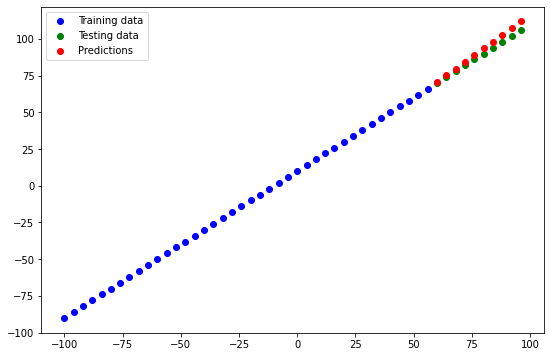

In [ ]:
plot_predictions()

### Evaluating our model predictions with regression evaluation metrics

Depending on the problem you'r working on, there will be different evaluations metrics to evaluate our model performance. 

Since we're working on a regression, two of the main metrics: 
* MAE: mean absolute error. "on average how wrong is my model predictions"
* MSE: mean square error. "Square the average error.

In [ ]:
## Evaluate the model on test

model.evaluate(X_test, y_test) #Input data, original Y label

1/1 [==============================] - 0s 122ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
## Calculate mean absolute error

tf.metrics.mean_absolute_error(y_test,y_pred)  #But it is not returning the single value due to shape issue

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
y_test.shape, y_pred.shape #shape issue

(TensorShape([10]), (10, 1))

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
## Calculate mean absolute error

tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))  

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
#Calculate mean squarred error 

tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred)) #Use while: Larger error are more significant than smaller error

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# Make some functions to reuse mae and mse

def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true, y_pred= y_pred)

### Running experiment to impove our model

run -> fit -> evaluate -> tweak it.

1. Get more data - get more example for your model to train on (more opportunities to learn patterns or relationship between features amd labels) 
2. Make you model larger
3. Train longer 

Let do 3 modelling experiment: 

1. `model1` same as original model, 1 layer, trained for 100 epochs. 
2. `model2` 2 layers trained for 100 epochs
3. `model3` 2 layers trained for 500 epochs

Build `model1`:

In [ ]:
#Set random 
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.losses.mae,
              optimizer=tf.optimizers.SGD(),
              metrics=["mae"])

model_1.fit(X_train,y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - 

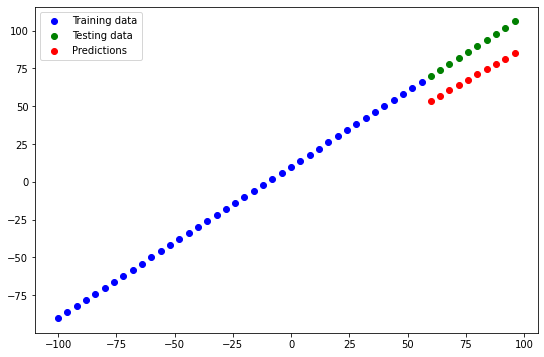

In [ ]:
# Make prediction and plot results
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
#Calculate model_1 evaluation metrics
mae_1 = mae(y_test,tf.squeeze(y_pred_1))
mse_1 = mse(y_test, tf.squeeze(y_pred_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

Build `model 2`

- 2 dense layer, trained for 100 epochs.

In [ ]:
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(50, input_shape=[1]),
                               tf.keras.layers.Dense(1)
])

model_2.compile(loss= tf.losses.mae,
                optimizer = tf.optimizers.SGD(),
                metrics=["mae"])

model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 48.6818 - mae: 48.6818
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 31.4714 - mae: 31.4714
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 36.1933 - mae: 36.1933
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 28.7904 - mae: 28.7904
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 15.6153 - mae: 15.6153
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 12.3877 - mae: 12.3877
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6691 - mae: 11.6691
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 12.0728 - mae: 12.0728
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 37.7908 - mae: 37.7908
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 25.4126 - mae: 25.4126
Epoch 11/100
2/2 [==============================] - 0s 7ms/

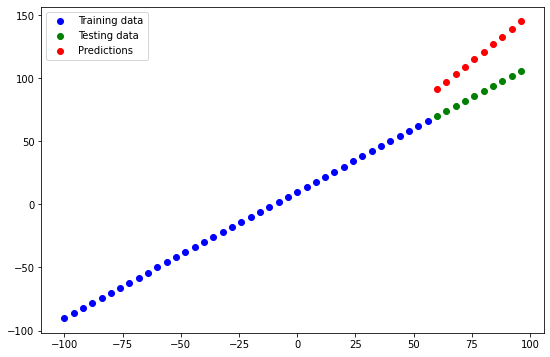

In [ ]:
#prediction and plot
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
#Calculate model 2 evaluations
mae_2 = mae(y_test, tf.squeeze(y_pred_2))
mse_2 = mse(y_test, tf.squeeze(y_pred_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=30.08717>,
 <tf.Tensor: shape=(), dtype=float32, numpy=936.91925>)

`model_3`

- Train for 500 epochs


In [ ]:
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(50, input_shape=[1]),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss= tf.losses.mae,
                optimizer = tf.optimizers.SGD(),
                metrics=["mae"])

model_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 45.0499 - mae: 45.0499
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 33.9455 - mae: 33.9455
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 30.1634 - mae: 30.1634
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 16.2336 - mae: 16.2336
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 22.1648 - mae: 22.1648
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 11.5499 - mae: 11.5499
Epoch 7/500
2/2 [==============================] - 0s 14ms/step - loss: 12.6435 - mae: 12.6435
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 11.0990 - mae: 11.0990
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 40.0500 - mae: 40.0500
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4977 - mae: 27.4977
Epoch 11/500
2/2 [==============================] - 0s 5ms

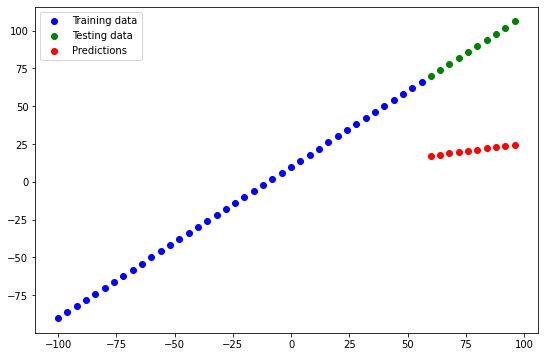

In [ ]:
#predict and plot
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

##Model is overfitting

In [ ]:
mae_3 = mae(y_test, tf.squeeze(y_pred_3))
mse_3 = mse(y_test, tf.squeeze(y_pred_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.17448>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4594.9453>)

🔑 **Note** You want to start with small model and do experiment slowly increase their scale when required.


## Comparing the results of our experiment

We'have run a few experiments , lets compare the results. 


In [ ]:
#Let's compare our model using a pandas dataframe 

import pandas as pd 

model_results = [["Model_1", mae_1.numpy(), mse_1.numpy()],
                 ["Model_2", mae_2.numpy(),mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns= ["Model", "mae", "mse"])

all_results


,Model,mae,mse
0,Model_1,18.745327,353.573364
1,Model_2,30.087170,936.919250
2,model_3,67.174477,4594.945312


**Note**: One of the main goals should be to minimize the time between your experiment. The more experiments you do the more things you figure out which don't work and in the turn get closer to figuring out what does work. Machine practioner motoo is to "experiment, experiment, experiment"

### Track your experiments

One really good jhabit is to track results of your experiments. 

And when doing so, it can be tedious if you are running lots of experiments. 

Luckily there are tools to help us.

**Resources**: As you build models you want to look into using: 

- Tensorboard: Component of tensorflow library
- Weights & Biases: a tool for tracking all kinds of machine learning experiments (Plugs straight into tensorboard)

### Saving our model

There are two formats we can save our model to: 
1. Save Model format `model.save('folder')`
2. HDF5 format `model.save('filename.h5')`

In [ ]:
# Save model using save model format 

model_2.save("best_model_savemodel_format")


INFO:tensorflow:Assets written to: best_model_savemodel_format/assets


In [ ]:
# save model using hdf5

model_2.save("best_model_hdf5_format.h5")

## Loading a saved model


In [ ]:
# Load a saved model format 

loaded_savedModel_format = tf.keras.models.load_model('best_model_savemodel_format')
loaded_savedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


### A larger example


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
insaurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insaurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insaurance_onehot_encoding = pd.get_dummies(insaurance)
insaurance_onehot_encoding.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#Create X & Y values
X = insaurance_onehot_encoding.drop('charges', axis=1)
Y = insaurance_onehot_encoding['charges']

In [ ]:
#view X values 
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
#View Y values
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#Create training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
#lets createa a model 

# 1. Create model 

insaurance_model = tf.keras.Sequential([
                          tf.keras.layers.Dense(50),
                          tf.keras.layers.Dense(1)
])

#2. Compile model
insaurance_model.compile(loss= tf.keras.losses.mae, 
                         optimizer = tf.keras.optimizers.SGD(),
                         metrics=["mae"])

#3 Fit the model 
insaurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8629.0762 - mae: 8629.0762
Epoch 2/100
34/34 [==============================] - 0s 972us/step - loss: 7874.2749 - mae: 7874.2749
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7597.6318 - mae: 7597.6318
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7668.9697 - mae: 7668.9697
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7827.3857 - mae: 7827.3857
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7593.7544 - mae: 7593.7544
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7548.5156 - mae: 7548.5156
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7786.9980 - mae: 7786.9980
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7544.0161 - mae: 7544.0161
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7719.9243 - mae: 7719.92

In [ ]:
# Evaluate model 

insaurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6984.7109 - mae: 6984.7109


[6984.7109375, 6984.7109375]


Our model didn't performed well. Let's try and improve it.

To imporve we will run 2 experiments: 

1. Add an extra layer with more hidden units
2. Train for longer

In [ ]:
tf.random.set_seed(42)

insaurance_model_two = tf.keras.Sequential([
                          tf.keras.layers.Dense(100),
                          tf.keras.layers.Dense(10),
                          tf.keras.layers.Dense(1)
])

insaurance_model_two.compile(loss=tf.keras.losses.mae,
                             optimizer = tf.keras.optimizers.Adam(learning_rate=0.003),
                             metrics=["mae"])

insaurance_model_two.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13105.4668 - mae: 13105.4668
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 11623.8945 - mae: 11623.8945
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 8296.0234 - mae: 8296.0234
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7446.2319 - mae: 7446.2319
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7369.7656 - mae: 7369.7656
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7319.3213 - mae: 7319.3213
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7246.9741 - mae: 7246.9741
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7182.8457 - mae: 7182.8457
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7115.3027 - mae: 7115.3027
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7044.3750 - mae: 7044.

In [ ]:
#Evaluate the model 
insaurance_model_two.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3245.8386 - mae: 3245.8386


[3245.838623046875, 3245.838623046875]

#### Insaurance model 3 with same as above arhitechture but more epochs 



In [ ]:
#Create a model

tf.random.set_seed(42)

insaurance_model_three = tf.keras.Sequential([
                                              tf.keras.layers.Dense(100),
                                              tf.keras.layers.Dense(10),
                                              tf.keras.layers.Dense(1)
])

insaurance_model_three.compile(loss = tf.keras.losses.mae,
                               optimizer= tf.keras.optimizers.Adam(learning_rate=0.003),
                               metrics=["mae"])

history = insaurance_model_three.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13105.4668 - mae: 13105.4668
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 11623.8945 - mae: 11623.8945
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 8296.0234 - mae: 8296.0234
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 7446.2319 - mae: 7446.2319
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 7369.7656 - mae: 7369.7656
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 7319.3213 - mae: 7319.3213
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7246.9741 - mae: 7246.9741
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7182.8457 - mae: 7182.8457
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7115.3027 - mae: 7115.3027
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7044.3750 - mae: 7044.

In [ ]:
#evaluate our model 

insaurance_model_three.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3161.8723 - mae: 3161.8723


[3161.872314453125, 3161.872314453125]

Text(0.5, 0, 'epochs')

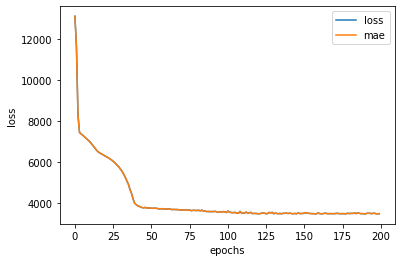

In [ ]:
#Plot history (also known as loss curve or training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> How long you should train for 

It depends on the problem you are working on. 
For solution there is [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) which can be added to your model.



### Preprocessing data(normalization and standardization)

in terms of scalling values, neural networks tends to prefer normalization. 

If you are not sure which one to use, you can try both and check performance. 

In [ ]:
X


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


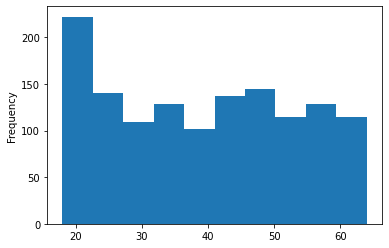

In [ ]:

X['age'].plot(kind='hist')

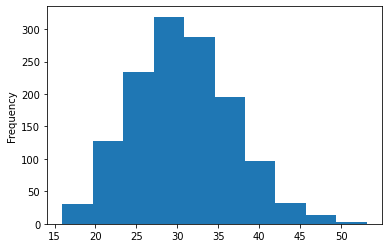

In [ ]:
X['bmi'].plot(kind='hist')

In [ ]:
import pandas as pd 
import tensorflow as tf

import matplotlib.pyplot as plt

In [ ]:
insaurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insaurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikitlearn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#create a columns transformer 

ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X & Y values
X = insaurance.drop("charges", axis=1)
y = insaurance['charges']

#Build our train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Tranform training and test
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0] #Before data

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0] # Tranformed data

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
#let check the shape 

X_train.shape , X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural networks model on this data. 

In [ ]:
tf.random.set_seed(42)
# 1. Build a model 

insaurance_model_4 = tf.keras.Sequential([
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(1)
])
# 2. Compile the model
insaurance_model_4.compile(loss= tf.keras.losses.mae, 
                   optimizer = tf.keras.optimizers.Adam(learning_rate=0.003),
                   metrics=["mae"])

#3. Fit model on the data
history = insaurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13333.4199 - mae: 13333.4199
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13241.6611 - mae: 13241.6611
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12900.9150 - mae: 12900.9150
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12065.0410 - mae: 12065.0410
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10652.5215 - mae: 10652.5215
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9156.8223 - mae: 9156.8223
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8214.4463 - mae: 8214.4463
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7891.6348 - mae: 7891.6348
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7745.9634 - mae: 7745.9634
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7615.1323 - mae:

In [ ]:
## Evaluate our model 

insaurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3182.5317 - mae: 3182.5317


[3182.53173828125, 3182.53173828125]

In [ ]:
# Insaurance model two
## 9/9 [==============================] - 0s 3ms/step - loss: 3245.8386 - mae: 3245.8386 

Text(0, 0.5, 'loss')

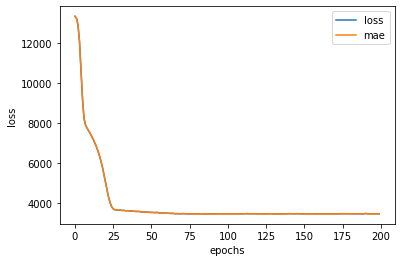

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")